# Tester: Linear SDE's

A Linear SDE for a $n$-dimensional system is of the form
    $$ dX_t = AX_tdt + \sigma dW_t $$
where $W_t$ is a $m$-dimensional Wiener process.

In [4]:
using PyPlot
using Random

# Get software to generate model
include("../LinearSDE/modgen_LSDE.jl")

# Get model reduction software being tested
include("../../Tools/Model_Reduction_Dev.jl")

# Get tester tools
include("testertools.jl")

causal_test (generic function with 1 method)

In [5]:
# Model run Parameters
t_start = 0
t_stop  = 1e3
h       = 1e-2

A       = reshape([-0.5],1,1)
σ       = reshape([1],1,1)
Xo      = [1]
t_disc  = 100
gap     = 1

# Get full model run
Random.seed!(2014)
X = modgen_LSDE(t_start,t_stop,h;
    A, σ, Xo, t_disc, gap)

1×90001 Array{Float64,2}:
 -0.613524  -0.534909  -0.475822  …  -0.823833  -0.786908  -0.842031

In [6]:
# Put in Psi functions
Psi(x) = x

Psi (generic function with 1 method)

In [7]:
# Model reduction Parameters
M_out = 100
n = 2
p = 500
par = 55
ty = "bin"
rl = true
Preds = true
PI = false
rtol = 1e-6

nfft = 1024

@time h_wf, pred = get_wf(X, Psi;
    M_out, n, p, par, ty, nfft, rl, Preds, PI, rtol);

X_sig = X[:,2:end]

Number of CKMS iterations: 133
errK errR : 2.6568751778621344e-11 1.415333433858973e-14
 10.869145 seconds (35.35 M allocations: 1.790 GiB, 7.02% gc time)


1×90000 Array{Float64,2}:
 -0.534909  -0.475822  -0.485553  …  -0.823833  -0.786908  -0.842031

In [8]:
pred

1×90000 Array{Complex{Float64},2}:
 -0.613524+0.0im  -0.534909+0.0im  …  -0.823833+0.0im  -0.786908+0.0im

## Analyze Wiener Filter

In [9]:
h_wf

1×1×100 Array{Float64,3}:
[:, :, 1] =
 0.9919349839409488

[:, :, 2] =
 -0.0018356819685355493

[:, :, 3] =
 0.005150154633584135

...

[:, :, 98] =
 -3.319811659733008e-7

[:, :, 99] =
 -1.780465376648296e-7

[:, :, 100] =
 9.266884051820623e-8

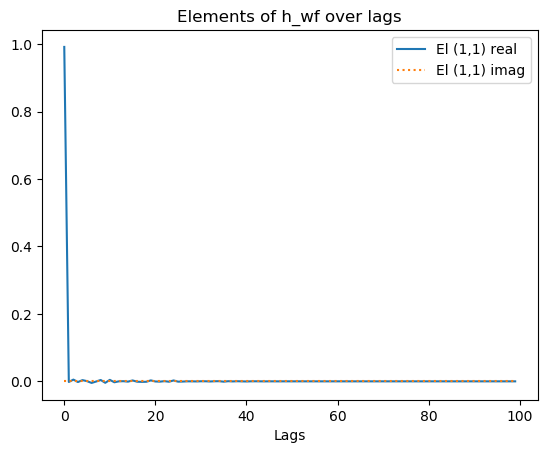

PyObject Text(0.5, 1, 'Elements of h_wf over lags')

In [10]:
plot_WF(h_wf, rl = false)

## Analyze One step prediction error

In [11]:
X_hat = one_step_pred(X_sig, h_wf, pred)

1×90000 Array{Complex{Float64},2}:
 -0.534909+0.0im  -0.475822+0.0im  …  -0.817899+0.0im  -0.783318+0.0im

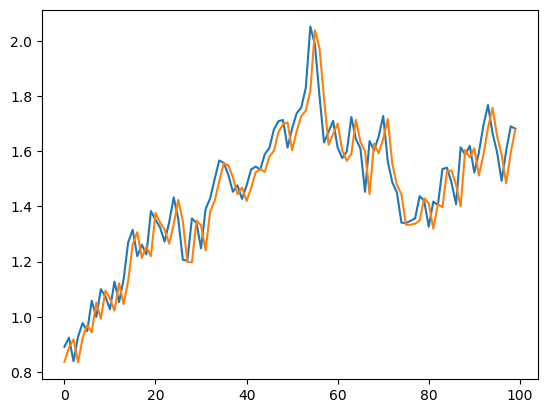

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


2-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000493BC308>
 PyObject <matplotlib.lines.Line2D object at 0x0000000044473F48>

In [12]:
wind = (1:100) .+ 24000
plot([X_sig[1,wind] X_hat[1,wind]])

In [13]:
X_err = X_sig - X_hat

1×90000 Array{Complex{Float64},2}:
 0.0-0.0im  0.0-0.0im  0.0-0.0im  …  -0.35831-0.0im  -0.422422-0.0im

In [15]:
C = my_crosscov(pred[:],X_err[:],-100:10)

111-element Array{Complex{Float64},1}:
  0.23273298667868952 + 9.666274176497122e-18im
  0.23397627679513408 + 1.3134240659224953e-17im
  0.23509414080357913 + 1.626293219421529e-17im
  0.23611977746732657 + 6.626849853523164e-18im
  0.23699760160999664 + 1.2554198458432989e-17im
  0.23774486088251462 + 3.201331965471792e-18im
  0.23834524682102218 + 9.88758965364448e-18im
  0.23880535007238204 + 2.271918191284265e-17im
  0.23910794107439648 + 4.66552916119957e-18im
  0.23930902765683038 + 1.1886465554332354e-18im
  0.23935624123378624 + 6.2316597482353156e-18im
  0.23926209028370535 - 7.457652787164372e-18im
   0.2390414100260184 + 9.436871799456584e-18im
                      ⋮
 -0.09283590578505913 + 2.828883210257587e-18im
  -0.0922794764170065 + 1.2405141767883734e-17im
  -0.0818167893508299 - 2.3049852365362185e-18im
 -0.08144013950687955 - 4.0068466225563376e-18im
 -0.08108770286253153 - 8.4968229991421e-18im
  -0.0806937647341005 - 1.2226441303836427e-18im
 -0.08033015008407131

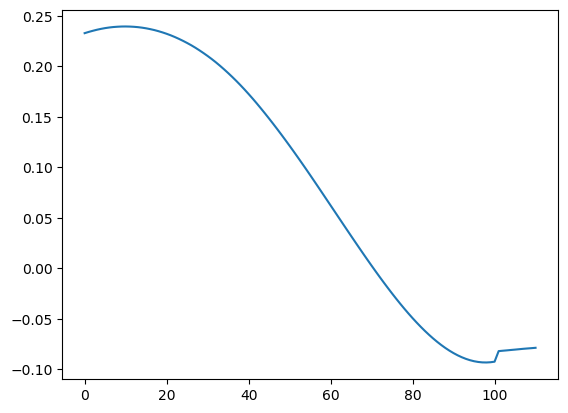

C:\Users\jared\.julia\conda\3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000015C71C8>

In [16]:
plot(C)

## Analyze Reduced Model Run

In [17]:
X_rm = redmodrun(X, h_wf, Psi)


reduced model blewup at step 4768
